In [1]:
import librosa as lr
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
# LOAD AUDIO

audio = []
counter = 0

for filename in os.listdir('../sample_audio'):
    print(filename)
    filename, sr = lr.load(f'../sample_audio/{filename}') # sample rate
    counter += 1
    audio.append(filename)

In [7]:
len(audio[2])


2635072

In [9]:
# STFT params

FRAME_SIZE = 2048
HOP_SIZE = 342

In [10]:
# First Transformation Short Time Fourier Tranform (STFT)

transformed_audio = []

for song in audio:
    stft = lr.stft(song, n_fft = FRAME_SIZE-1, hop_length = HOP_SIZE)
    stft = np.abs(stft) ** 2
    transformed_audio.append(stft)

In [13]:
transformed_audio[5].shape

(1024, 9322)

In [14]:
# Plot Spectrogram

def plot_spectrogram(Y, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(25, 10))
    lr.display.specshow(Y, 
                        sr=sr,
                       hop_length = hop_length,
                       x_axis='time',
                       y_axis=y_axis)
    plt.colorbar(format="%+2.f")

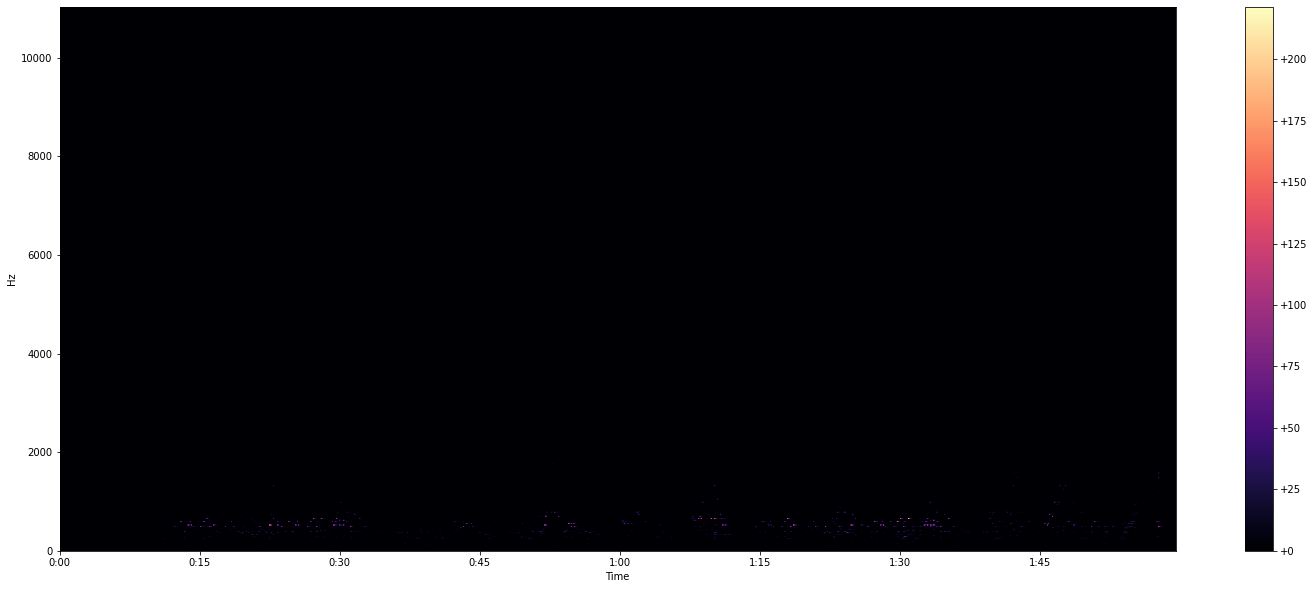

In [15]:
plot_spectrogram(transformed_audio[2],sr ,HOP_SIZE )

In [16]:
# Second Tranformation (power to db)

transformed_log_audio = []
for stft in transformed_audio:
    log_stft = lr.power_to_db(stft)
    transformed_log_audio.append(log_stft)

In [18]:
transformed_log_audio[2].shape

(1024, 7705)

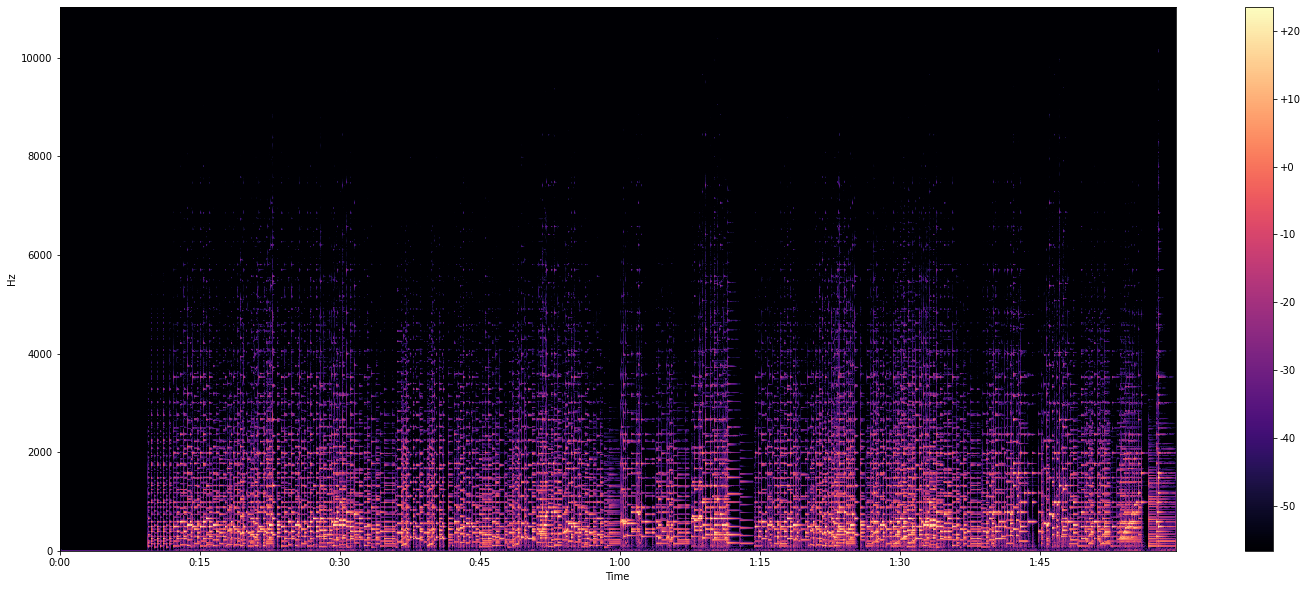

In [19]:
plot_spectrogram(transformed_log_audio[2], sr ,HOP_SIZE, y_axis ='linear' )

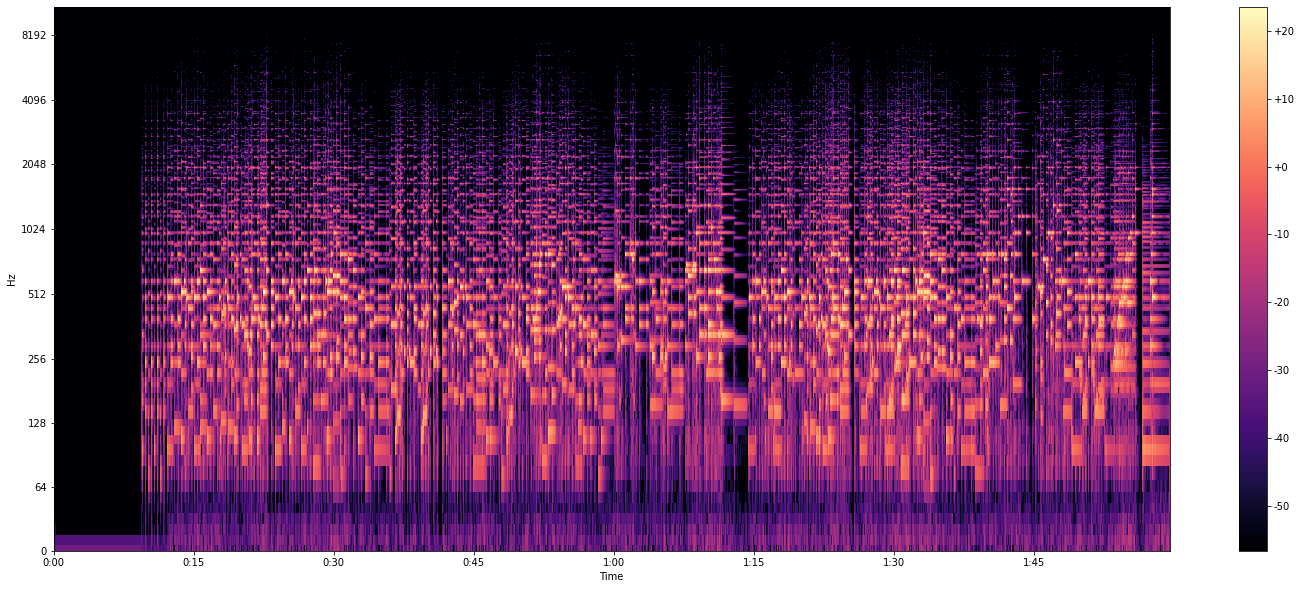

In [20]:
plot_spectrogram(transformed_log_audio[2], sr ,HOP_SIZE, y_axis ='log' )

In [ ]:
# Export converted audio file as numpy array ( .npy file)

counter = 1
for npy in transformed_log_audio:
    np.save(f'../npy_files/npy_file_no{counter}', npy)
    counter += 1